# Aluminum solve using Tableau OR PHREEQC method

use the same constants as used in PHREEQC method

In [674]:
% setup environment
% clear data and number format
clear; format short e
% set path to equilibrium solver
txt=pwd; n=length(txt); rootpath=txt;
n=strfind(rootpath,"USERS"); rootpath=txt(1:n-2);
PHREEQCpath=[rootpath,'/runPHREEQC'];
addpath(PHREEQCpath);
JEQUILIBpath=[rootpath,'/JEQUILIB'];
addpath(JEQUILIBpath);
% turn off warnings
warning off
%graphics_toolkit ("notebook"); 
graphics_toolkit ("plotly"); 
%graphics_toolkit("gnuplot")
%delete existing phreeqc files
system("rm DATABASE.dat");
system("rm runfile.txt");
%create empty phreeqc files
system("touch DATABASE.dat");
system("touch runfile.txt");

In [675]:
% define equilibrium problem

AlT=10e-5; ClT=3*AlT; pH=2:0.1:12; pe=20.75-pH; T=25; show=0;

# add flag0 to pick PHREEQC or tableau-based solver

flag0=1 for PHREEQC and =0 for tableau based.  PHREEQC will ignore the other flags (but maybe eventually for matlab version include the show phreeeqc output option, doesn[t work in Jupyter)

In [676]:
% MODEL USING TABLEAU (different gradients or log versus linear variables)
%graphics_toolkit("notebook")
%model with just inorganic speciation
%geochemical model
% input the constants and solution chemistry
flag0=0; %choose solver. 0 for tableau and 1 for phreeqc-based solver
flag1=2; %flag1 for concentration based search vector (1) or for log based search vector (2).
flag2=1; %flag2 for numerical derivatives (2) or analtyical derivatives (1)
flag3=0; % flag3 1 for show warnings. 0 no warnings
flag4=1; %if=1 solve tableau one line at a time to get a good initial guess (no solids). really challenging probs only
flag5=0; %if=1 use stored initial guess for including solids

TOTALS=[AlT; ClT]';
TOTALS(TOTALS==0)=1e-16; % get rid of zero values, b/c div by zero error

for i=1:length(pH)
[Alp3(i),AlLOH3Rs(i),Al13LOHR32p7(i),AlLOHR4m(i),MASSERR(i)]=AltableauPICKER(pH(i),pe(i),TOTALS',flag0,flag1,flag2,flag3,flag4,flag5);
end

flag0=1; %PHREEQC

for i=1:length(pH)
[PAlp3(i),PAlLOH3Rs(i),PAl13LOHR32p7(i),PAlLOHR4m(i),PMASSERR(i)]=AltableauPICKER(pH(i),pe(i),TOTALS',flag0,flag1,flag2,flag3,flag4,flag5);
end


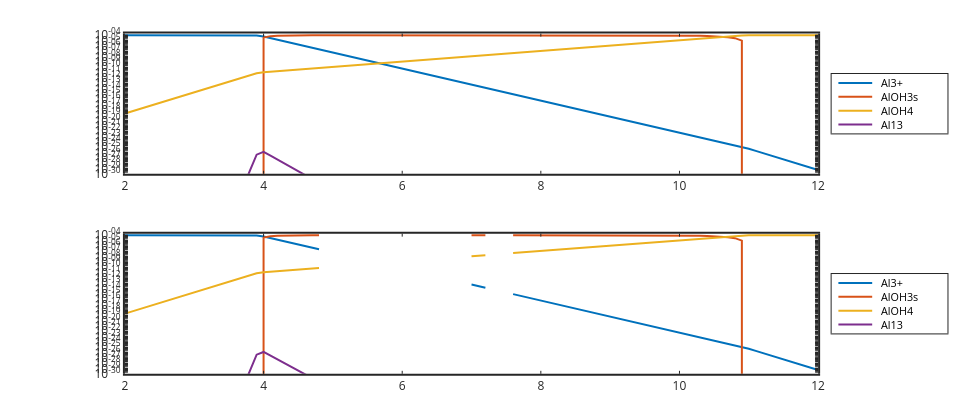

In [677]:
subplot(211)
semilogy(pH,Alp3,'linewidth',2,pH,AlLOH3Rs,'linewidth',2,pH,AlLOHR4m,'linewidth',2, ...
pH,Al13LOHR32p7,'linewidth',2)
 set(gca,'linewidth',2,'fontsize',12)
legend('Al3+','AlOH3s','AlOH4','Al13','location','eastoutside')
axis([2 12 1e-30 2e-4])

subplot(212)
semilogy(pH,PAlp3,'linewidth',2,pH,PAlLOH3Rs,'linewidth',2,pH,PAlLOHR4m,'linewidth',2, ...
pH,PAl13LOHR32p7,'linewidth',2)
set(gca,'linewidth',2,'fontsize',12)
legend('Al3+','AlOH3s','AlOH4','Al13','location','eastoutside')
axis([2 12 1e-30 2e-4])


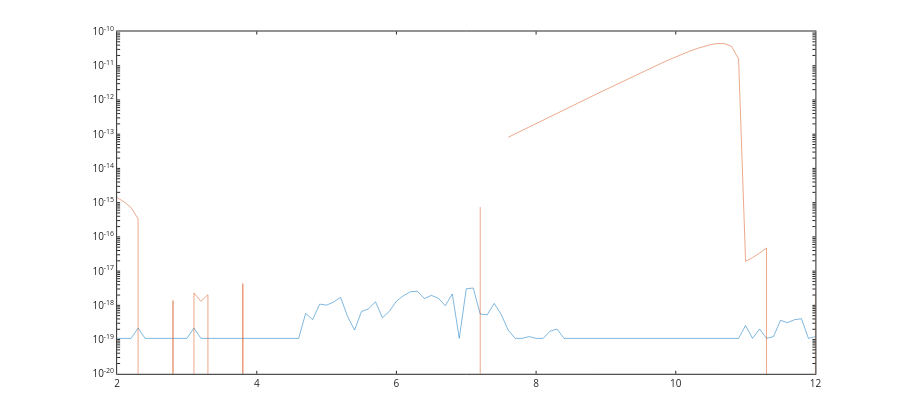

In [678]:
semilogy(pH,MASSERR,pH,PMASSERR)